Train on 162 samples, validate on 18 samples
Epoch 1/50
162/162 [==============================] - 14s 84ms/step - loss: 0.4713 - acc: 0.8519 - val_loss: 0.3845 - val_acc: 0.9444

Epoch 00001: val_acc improved from -inf to 0.94444, saving model to wight_cnn_model2_ph2_5_20%val_last.h5
Epoch 2/50
162/162 [==============================] - 4s 25ms/step - loss: 0.3963 - acc: 0.8827 - val_loss: 0.3002 - val_acc: 0.8889

Epoch 00002: val_acc did not improve from 0.94444
Epoch 3/50
162/162 [==============================] - 4s 25ms/step - loss: 0.5032 - acc: 0.8704 - val_loss: 0.4256 - val_acc: 0.9444

Epoch 00003: val_acc did not improve from 0.94444
Epoch 4/50
162/162 [==============================] - 4s 25ms/step - loss: 0.3626 - acc: 0.9259 - val_loss: 0.3581 - val_acc: 0.9444

Epoch 00004: val_acc did not improve from 0.94444
Epoch 5/50
162/162 [==============================] - 4s 25ms/step - loss: 0.4066 - acc: 0.8827 - val_loss: 0.3128 - val_acc: 0.9444

Epoch 00005: val_acc did not

162/162 [==============================] - 4s 25ms/step - loss: 0.4001 - acc: 0.8827 - val_loss: 0.4986 - val_acc: 0.7778

Epoch 00044: val_acc did not improve from 1.00000
Epoch 45/50
162/162 [==============================] - 4s 25ms/step - loss: 0.2607 - acc: 0.9259 - val_loss: 0.5588 - val_acc: 0.8333

Epoch 00045: val_acc did not improve from 1.00000
Epoch 46/50
162/162 [==============================] - 4s 25ms/step - loss: 0.3287 - acc: 0.8765 - val_loss: 0.4556 - val_acc: 0.8333

Epoch 00046: val_acc did not improve from 1.00000
Epoch 47/50
162/162 [==============================] - 4s 25ms/step - loss: 0.2525 - acc: 0.9321 - val_loss: 0.3407 - val_acc: 0.9444

Epoch 00047: val_acc did not improve from 1.00000
Epoch 48/50
162/162 [==============================] - 4s 25ms/step - loss: 0.2614 - acc: 0.9259 - val_loss: 0.5509 - val_acc: 0.8889

Epoch 00048: val_acc did not improve from 1.00000
Epoch 49/50
162/162 [==============================] - 4s 25ms/step - loss: 0.2747 - ac

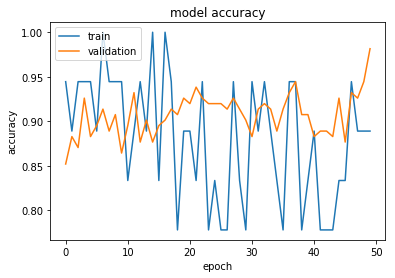

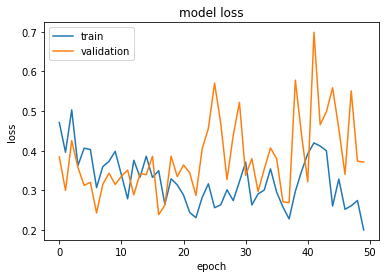

{0: 1.0}
{0: 1.0, 1: 1.0}
{0: 1.0, 1: 1.0, 2: 1.0}


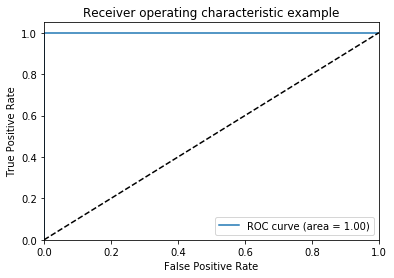

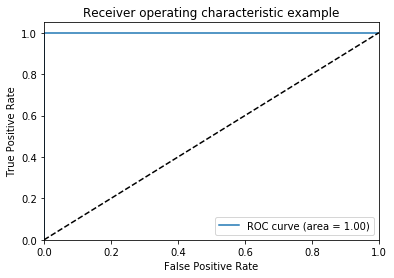

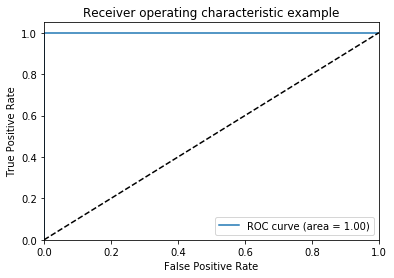

In [73]:

#from numpy.random import seed
#seed(1)
#from tensorflow import set_random_seed
#set_random_seed(2)

import numpy as np
import tensorflow as tf
import random as rn
import os
os.environ['PYTHONHASHSEED']='0'
#setting the seed nupy generator random number
np.random.seed(12)
#setting the seed for python random numbers
rn.seed(13)
#setting the seed for tensorflow
tf.set_random_seed(14)
from keras import backend as k

#force tensorflow to use a single thread
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
k.set_session(sess)


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import pickle
from keras.callbacks import ModelCheckpoint
import sklearn
from sklearn.metrics import roc_curve, auc
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.callbacks import TensorBoard

import matplotlib.pyplot as plt
import time




pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)




# Convert labels to categorical one-hot encoding
Y = keras.utils.to_categorical(y, num_classes=3)
y_test= keras.utils.to_categorical(y_test, num_classes=3)


#from keras import regularizers
reg=keras.regularizers.l2(0.0005)
#reg=None



#set the training and validation sets 
X_train_set=X[:54]  
y_train_set=Y[:54]
X_train_set2=X[72:180]
y_train_set2=Y[72:180]

X_trainig=np.concatenate([X_train_set,X_train_set2])
y_trainig=np.concatenate([y_train_set,y_train_set2])

X_val_set=X[54:72]
y_val_set=Y[54:72]









model = Sequential()

model.add(Conv2D(560, (3, 3), activation ='relu', input_shape=(200, 200, 3), kernel_regularizer=reg, 
                 bias_regularizer=reg))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(280, (3, 3), activation ='relu', kernel_regularizer=reg, bias_regularizer=reg))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(140, (3, 3), activation ='relu', kernel_regularizer=reg, bias_regularizer=reg))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(70, (3, 3), activation ='relu', kernel_regularizer=reg, bias_regularizer=reg))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))

model.add(Conv2D(32, (3, 3), strides = 1, activation ='relu', kernel_regularizer=reg, bias_regularizer=reg))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(32, activation ='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation ='softmax'))

#combile the model
model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          #shuffle=False
                          )
#loading the best model wights of previuos traing
#model.load_weights('weights_cnn_model2_6.h5')
#model.load_weights('wight_cnn_model2_ph2_3_20%val_last.h5')
model.load_weights('wight_cnn_model2_ph2_4_20%val_last.h5')


#save the best model wights
cb= ModelCheckpoint(filepath='wight_cnn_model2_ph2_5_20%val_last.h5',verbose=1, monitor='val_acc', save_best_only=True, save_weights_only=True)

#fit the model
history=model.fit(X_trainig, 
                  y_trainig,
                  batch_size=10,
                  epochs=50,
                  validation_data=(X_val_set,y_val_set),
                  shuffle=True,
                  callbacks=[cb]
                     )



score, acc=model.evaluate( X_test, y_test)
print('Test loss')
print(score)
print('Test accuracy')
print(acc)

y_pred = model.predict_proba(X_test)
auc_value=sklearn.metrics.roc_auc_score(y_test, y_pred)
print('roc_auc_score')
print(auc_value)

#plot the acc and loss curves

print(history.history.keys())

plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#plot AUC curves
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        print(roc_auc)
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
for i in range(3):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = {:.2f})'.format(roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()    


In [ ]:
#model.save('CNN_wierd_model_kaggel_dataset.h5')91

#model.save('CNN_wierd_model_ph2_85.h5')

#model.save('CNN_wierd_model_ph2_20%val_94acc.h5') 

In [74]:
#model.save('CNN_wierd_model_ph2_20%val_94acc_1_ROC.h5')
model.save('CNN_wierd_model_PH2_fixed_split_2_100%acc__1.0AUC.h5')

confusion matrix of : 
[[8 0 0]
 [0 7 0]
 [0 0 5]]
 confusion matrix, without normalized
[[8 0 0]
 [0 7 0]
 [0 0 5]]


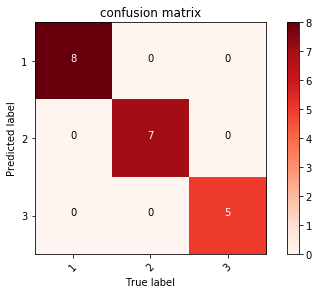

In [78]:
# create the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools 
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("confusion matrix of : ")
print(cm)

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='confusion matrix',
                         cmap=plt.cm.Reds):
    # this funcation print & plots confusion matrix
    # normalize can be applied by  normalize=True,
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm= cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
        print("normalized confusion matrix")
    else:
        print(" confusion matrix, without normalized")
    print(cm)
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')

    '''input to confusion_matrix must be a list of predictions, not OHEs (one hot encodings). 
    Call argmax on your y_test and y_pred, and you should get what you expect.'''

from sklearn.utils.multiclass import unique_labels
classes = [1,2,3]
plot_confusion_matrix(cm,classes)


In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_331 (Conv2D)          (None, 198, 198, 560)     15680     
_________________________________________________________________
max_pooling2d_331 (MaxPoolin (None, 99, 99, 560)       0         
_________________________________________________________________
dropout_366 (Dropout)        (None, 99, 99, 560)       0         
_________________________________________________________________
conv2d_332 (Conv2D)          (None, 97, 97, 280)       1411480   
_________________________________________________________________
max_pooling2d_332 (MaxPoolin (None, 48, 48, 280)       0         
_________________________________________________________________
dropout_367 (Dropout)        (None, 48, 48, 280)       0         
_________________________________________________________________
conv2d_333 (Conv2D)          (None, 46, 46, 140)       352940    
__________